# S2 Deep Learning

## nn.Conv2d





- Kernel size, stride, padding, dilatation controls the dimensions of the output.

In [2]:
import torch
import torch.nn as nn

In [8]:
conv1 = nn.Conv2d(in_channels=3, out_channels=2, kernel_size=3, stride=1)
conv2 = nn.Conv2d(in_channels=3, out_channels=2, kernel_size=3, stride=2)
conv3 = nn.Conv2d(in_channels=3, out_channels=2, kernel_size=3, stride=1, padding=1)

# Imagen de entrada (batch_size=1, canales=3, alto=5, ancho=5)
input_image = torch.randn(1, 3, 5, 5) # 5x5

output1 = conv1(input_image)
output2 = conv2(input_image)
output3 = conv3(input_image)

print(output1.shape)  # Salida: (1, 2, 3, 3)
print(output2.shape)  # Salida: (1, 2, 2, 2)
print(output3.shape)  # Salida: (1, 2, 5, 5)

torch.Size([1, 2, 3, 3])
torch.Size([1, 2, 2, 2])
torch.Size([1, 2, 5, 5])



<img src="images/image3.png" height="200"/>
<img src="images/image4.png" height="200"/>
<img src="images/image5.png" height="200"/>

- What about groups?

In [25]:
conv4 = nn.Conv2d(
    in_channels=8,
    out_channels=4, # four filters will be applied!
    kernel_size=3,
    groups=4 # groups filters
)

input_image = torch.randn(1, 8, 5, 5)

output_image = conv4(input_image)


print(output_image.shape)


torch.Size([1, 4, 3, 3])


<img src="images/image7.png" height="300"/>

[PyTorch 2D Convolution](https://www.youtube.com/watch?v=n8Mey4o8gLc)

In [6]:
import matplotlib.pyplot as plt

def visualize_tensor(tensor):
    # Extract the 3 channels from the tensor
    channels = tensor.squeeze(0)  # Remove the batch dimension (1)

    # Plot each channel as a heatmap
    fig, axes = plt.subplots(1, channels.shape[0], figsize=(12, 4))
    for i, ax in enumerate(axes):
        channel = channels[i].detach().numpy()
        im = ax.imshow(channel, cmap='viridis', interpolation='nearest')
        ax.set_title(f"Channel {i+1}")
        ax.axis("off")
        fig.colorbar(im, ax=ax, orientation='vertical')

    plt.tight_layout()
    plt.show()


torch.Size([1, 3, 32, 32])


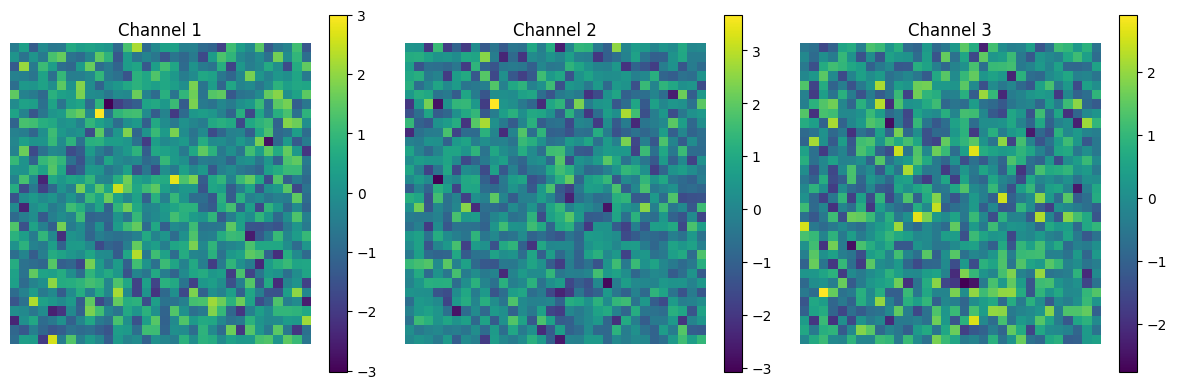

torch.Size([1, 2, 16, 16])


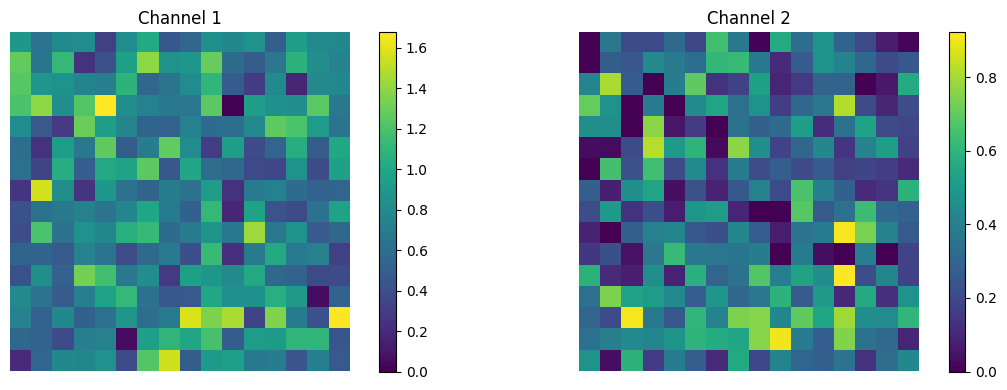

In [53]:
input = torch.randn(1, 3, 32, 32)

conv1 = nn.Conv2d(in_channels=3, out_channels=2, kernel_size=3, padding=1)
conv2 = nn.Conv2d( in_channels=2, out_channels=2, kernel_size=3, padding=1)
activation = nn.ReLU(inplace=True)
pooling = nn.MaxPool2d(kernel_size=2, stride=2) # reduces dimensions

# Forward :)
output = conv1(input)
output = conv2(output)
output = activation(output)
output = pooling(output)

# Visualization :)
print(input.shape)
visualize_tensor(input)
print(output.shape)
visualize_tensor(output)

How to count the number of parameters?

<img src="images/image14.png" height="400"/>

Ejemplo:

<img src="images/image15.png" height="400"/>

In [63]:
# Ejemplo (conv3x3)
layer = nn.Conv2d(in_channels=3, out_channels=2, kernel_size=3)

n_parameters = sum(p.numel() for p in layer.parameters())

print(f"Number of parameters (conv3x3): {n_parameters}")

# Ejemplo extra (conv 5x5)

layer = nn.Conv2d(in_channels=3, out_channels=2, kernel_size=5)

n_parameters = sum(p.numel() for p in layer.parameters())

print(f"Number of parameters (conv5x5): {n_parameters}")


Number of parameters (conv3x3): 56
Number of parameters (conv5x5): 152


### Past exam code

In [4]:
input = torch.tensor([[[[0,  0,  0,  1,  2], 
                        [1, -1,  2,  0,  1], 
                        [1,  1,  1,  1,  1], 
                        [-1,-1,  0, -1, -1], 
                        [2,  1,  0, -1,  2]]]], dtype=torch.float32)


convolution = nn.Conv2d(
    in_channels=1, 
    out_channels=1, 
    kernel_size=3, 
    stride=1, 
    padding=0,  # No padding as specified
    bias=False  # Exclude bias for manual calculation
)

# Manually set the kernel weights to match [0, 1, 0; 1, 0, 1; 1, 1, 1]
with torch.no_grad():
    convolution.weight = nn.Parameter(torch.tensor(
        [[[[0, 1, 0],
           [1, 0, 1],
           [1, 1, 1]]]],
        dtype=torch.float32
    ))

# Apply the convolution
output = convolution(input)
print("Convolved Output:\n", output)

# Perform mean pooling to reduce output to a single number
mean_value = torch.mean(output)
print("Mean Pooled Output:", mean_value.item())

# Apply ReLU for rectification
rectified_value = torch.relu(mean_value)
print("Rectified Value:", rectified_value.item())




Convolved Output:
 tensor([[[[ 6.,  2.,  7.],
          [-1.,  2.,  0.],
          [ 3., -1.,  1.]]]], grad_fn=<ConvolutionBackward0>)
Mean Pooled Output: 2.1111111640930176
Rectified Value: 2.1111111640930176


In [11]:
import torch.nn.functional as F

class GarmentClassifier(nn.Module):
    def __init__(self):
        super(GarmentClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5) # no padding: n-4 x n-4 = 16 x 16
        self.pool = nn.MaxPool2d(2, 2) # reduces dimensions: (n-4)/2 x (n-4)/2 = 8 x 8
        self.conv2 = nn.Conv2d(6, 16, 5) # no padding: (n-4)/2 - 4 x (n-4)/2 - 4 = 4 x 4
        
        
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        print(x.shape)
        x = self.pool(x)
        print(x.shape)
        x = F.relu(self.conv2(x))
        print(x.shape)
        x = x.view(-1, 16 * 4 * 4) # 256
        print(x.shape)
        x = self.fc1(x)
        print(x.shape)
        x = self.fc2(x)
        print(x.shape)
        x = self.fc3(x)
        print(x.shape)
        return x
    

input = torch.randn(1, 1, 20, 20) # n x n = 20 x 20
    
# [1 point] What is the total expected dimension of the feature map of the output of the convolutional layer in line 10?

# Dimensions: 16 x (n-4)/2 - 4 x (n-4)/2 - 4

model = GarmentClassifier()

prediction = model(input)


torch.Size([1, 6, 16, 16])
torch.Size([1, 6, 8, 8])
torch.Size([1, 16, 4, 4])
torch.Size([1, 256])
torch.Size([1, 120])
torch.Size([1, 84])
torch.Size([1, 10])


In [12]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2) # stride = 2
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2)



        self.fc = nn.Linear(16 * 8 * 8, 10)  # Asumiendo entrada de tamaño 32x32
    
    def forward(self, x):
        x = self.conv1(x)
        print(x.shape) # 1, 3, 32, 32
        x = self.relu1(x)
        x = self.pool1(x)
        print(x.shape) # 1, 16, 16, 16
        x = self.conv2(x)
        print(x.shape) # 1, 16, 16, 16
        x = self.relu2(x)
        x = self.pool2(x)
        print(x.shape) # 1, 16, 8, 8 
        x = x.view(x.size(0), -1)  # Aplanar el tensor
        x = self.fc(x)
        return x


input = torch.randn(1, 3, 32, 32)

model = SimpleCNN()
output = model(input)

torch.Size([1, 16, 32, 32])
torch.Size([1, 16, 16, 16])
torch.Size([1, 16, 16, 16])
torch.Size([1, 16, 8, 8])


In [6]:
# Number of parameters!
65 * 97 + 97
97 * 97 + 97
97 * 3 + 3

# Random search. me dice cuantas capaz necesito!
# model.add(Dense)

6402

## VGG

- Stack of conv layers.
- Reduces the number of parameters.

<img src="images/image13.png" height="400"/>

In [54]:
def conv5x5(in_chan, out_chan):
    return nn.Sequential(
        nn.Conv2d(in_chan, out_chan, kernel_size=3, padding=1),
        nn.Conv2d(out_chan, out_chan, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

def conv7x7(in_chan, out_chan):
      return nn.Sequential(
        nn.Conv2d(in_chan, out_chan, kernel_size=3, padding=1),
        nn.Conv2d(out_chan, out_chan, kernel_size=3, padding=1),
        nn.Conv2d(out_chan, out_chan, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

In [55]:
class VGG(nn.Module):
    def __init__(self,n_classes):
        super(VGG, self).__init__()
        self.ConvLayers = nn.Sequential(
            conv5x5(3, 64),
            conv5x5(64, 128),
            conv7x7(128, 256),
            conv7x7(256, 512),
            conv7x7(512 ,512)
        )
        self.FC = nn.Sequential(
            nn.Linear(4*4*512,4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(4096,4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(4096,n_classes)
        )

    def forward(self, x): # x: [n_batches, n_channels, height, width]
        x = self.ConvLayers(x)
        x = torch.flatten(x, 1)  # x: [n_batches, n_channels * height * width]

        # torhc.flatten(x, 1)
        x = self.FC(x)
        return x

# RESNET

In [57]:
class BasicBlock(nn.Module):
    def __init__(self, in_chan, out_chan):
        super(BasicBlock,self).__init__()

        projection = not (in_chan == out_chan)
        stride = 2 if projection else 1

        self.conv1 = nn.Conv2d(in_chan, out_chan, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_chan) # se normalizan los pesos (after every CONV layer)

        self.conv2 = nn.Conv2d(out_chan,out_chan,kernel_size=3,padding=1,bias=False)
        self.bn2 = nn.BatchNorm2d(out_chan)

        if projection:
            self.proj = nn.Sequence(
                nn.Conv2d(in_chan,out_chan,kernel_size=1,stride=2,bias=False),
                nn.BatchNorm2d(out_chan)
            )
        else:
            self.proj = nn.Identity()

        self.ReLU = nn.ReLU(inplace=True)

    def forward(self,x):
        z = self.conv1(x)
        z = self.bn1(z)
        z = self.ReLU(z)

        z = self.conv2(z)
        z = self.bn2(z)
        z = self.ReLU(z)

        # Projection
        x = self.proj(x)

        return x+z

In [58]:
class ResNet34(nn.Module):
    def __init__(self,n_classes):
        super(ResNet34,self).__init__()

        self.layer0 = nn.Sequential(
            nn.Conv2d(3,64,kernel_size=7,stride=2,padding=3,bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.layer1 = nn.Sequential(
            BasicBlock(64,64),
            BasicBlock(64,64),
            BasicBlock(64,64),
        )
        self.layer2 = nn.Sequential(
            BasicBlock(64,128),
            BasicBlock(128,128),
            BasicBlock(128,128),
            BasicBlock(128,128),
        )
        self.layer3 = nn.Sequential(
            BasicBlock(128,256),
            BasicBlock(256,256),
            BasicBlock(256,256),
            BasicBlock(256,256),
            BasicBlock(256,256),
            BasicBlock(256,256),
        )
        self.layer4 = nn.Sequential(
            BasicBlock(256,512),
            BasicBlock(512,512),
            BasicBlock(512,512),
        )

        self.AvgPool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(512,n_classes)

    def forward(self,x):
        # x: [n_batch,n_chan,h,w]
        x = self.layer0(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)  # [n_batch,n_chan,h,w]

                            #        0      1 2 3
        x = self.AvgPool(x) # [n_batch,n_chan,1,1]
        x = torch.flatten(x,1)  # [n_batch,n_chan]
        x = self.fc(x)
        return x